# BallIn'sights

### A dashboard to deliver comprehensive insights in aid predictions for the NCAA Men's Basketball March Madness.
***

##### Compare Player Shooting Stats:

Enter team 1:Michigan
Enter team2:Maryland


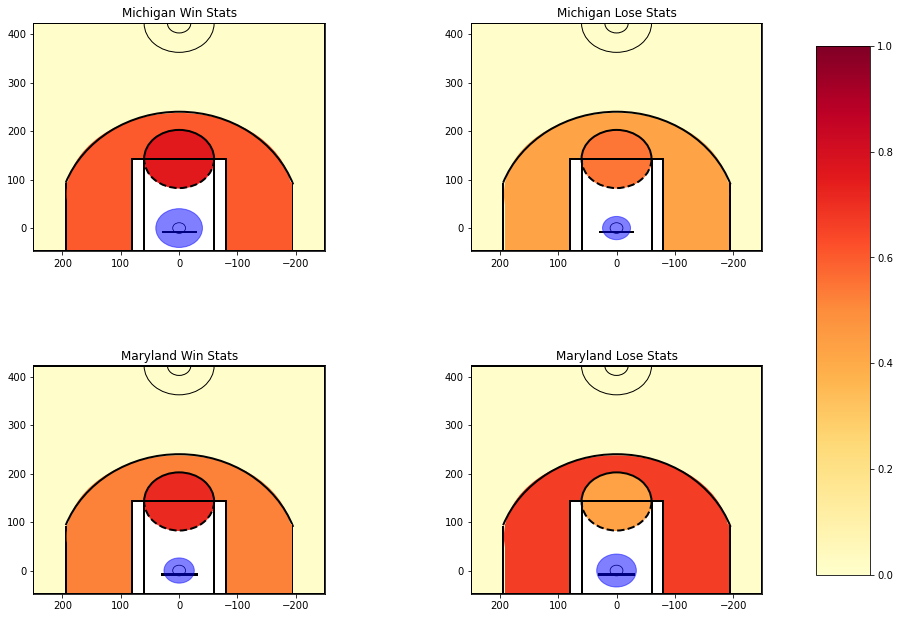

In [5]:
import matplotlib as mpl
from matplotlib.patches import Circle, Ellipse, Rectangle, Arc
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

MM_team_df = pd.read_csv(r"C:\Users\Suhana\Spring23\ballinsights\tourney_stats_team.csv")

cmap = plt.get_cmap('YlOrRd')
team1 = input("Enter team 1:")
team2 =  input("Enter team 2:")

def get_team1_win(inax):
    team1_row = MM_team_df[(MM_team_df.TeamName == team1)]
    keys = team1_row.columns.tolist()
    values = team1_row.iloc[0].tolist()
    team1_dict = dict(zip(keys, values))
    team1_dict['W3Pt%'] = team1_dict['W2Pt%']/100
    team1_dict['WFT%'] = team1_dict['WFT%']/100

    draw_court(ax=inax, outer_lines=True, intwo_percent=team1_dict['W2Pt%'], inthree_percent=team1_dict['W3Pt%'], inft_percent=team1_dict['WFT%'], inassist_ct=team1_dict['WAssists'])


def get_team1_lose(inax):
    team1_row = MM_team_df[(MM_team_df.TeamName == team1)]
    keys = team1_row.columns.tolist()
    values = team1_row.iloc[0].tolist()
    team1_dict = dict(zip(keys, values))
    team1_dict['L3Pt%'] = team1_dict['L2Pt%']/100
    team1_dict['LFT%'] = team1_dict['LFT%']/100

    draw_court(ax=inax, outer_lines=True, intwo_percent=team1_dict['L2Pt%'], inthree_percent=team1_dict['L3Pt%'], inft_percent=team1_dict['LFT%'], inassist_ct=team1_dict['LAssists'])

def get_team2_win(inax):
    team2_row = MM_team_df[(MM_team_df.TeamName == team2)]
    keys = team2_row.columns.tolist()
    values = team2_row.iloc[0].tolist()
    team2_dict = dict(zip(keys, values))
    team2_dict['W3Pt%'] = team2_dict['W2Pt%']/100
    team2_dict['WFT%'] = team2_dict['WFT%']/100

    draw_court(ax=inax, outer_lines=True, intwo_percent=team2_dict['W2Pt%'], inthree_percent=team2_dict['W3Pt%'], inft_percent=team2_dict['WFT%'], inassist_ct=team2_dict['WAssists'])


def get_team2_lose(inax):
    team2_row = MM_team_df[(MM_team_df.TeamName == team2)]
    keys = team2_row.columns.tolist()
    values = team2_row.iloc[0].tolist()
    team2_dict = dict(zip(keys, values))
    team2_dict['L3Pt%'] = team2_dict['L2Pt%']/100
    team2_dict['LFT%'] = team2_dict['LFT%']/100

    draw_court(ax=inax, outer_lines=True, intwo_percent=team2_dict['L2Pt%'], inthree_percent=team2_dict['L3Pt%'], inft_percent=team2_dict['LFT%'], inassist_ct=team2_dict['LAssists'])


def draw_court(ax=None, color='black', lw=2, outer_lines=False, intwo_percent=50, inthree_percent=50, inft_percent=50, inassist_ct=11):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=11, linewidth=0.75, color=color, fill=False)
    assist = Circle((0,0), radius=inassist_ct * 2, color = 'blue', fill=True, alpha = 0.5)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, edgecolor=color, facecolor = 'white', fill=True)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, edgecolor=color, fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')

    # Create shading
    ft_percent = plt.Circle((0, 142.5), 60, color = cmap(inft_percent),fill=True)
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    corner_three_a = Rectangle((-194, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((194, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    three_arc = Arc((0, 15), 415, 450, theta1=22, theta2=159, linewidth=lw,
                    color=color)
    two_percent = Ellipse((0, 70), 386, 335, color=cmap(intwo_percent), fill=True, linewidth = 0)
    two_percent2 = Rectangle((-193, -48), 385, 143, linewidth=0, color=cmap(intwo_percent), fill=True)


    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, color=color, fill=False)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, color=color, fill=False)

    three_percent = Rectangle((-250, -45), 500, 465, color=cmap(inthree_percent), fill=True)
    
    # List of the court elements to be plotted onto the axes
    court_elements = [three_percent, restricted, corner_three_a,
                      corner_three_b, two_percent, three_arc, two_percent2, center_outer_arc,
                      center_inner_arc, outer_box, backboard, hoop, assist, ft_percent, top_free_throw, bottom_free_throw, inner_box]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax



fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.set_size_inches(15, 10.5)

get_team1_win(ax1)
ax1.set_title(team1 + ' Win Stats')
ax1.set_xlim(250,-250)
ax1.set_ylim(-48,423)

get_team1_lose(ax2)
ax2.set_title(team1 + ' Lose Stats')
ax2.set_xlim(250, -250)
ax2.set_ylim(-48, 423)

fig.subplots_adjust(wspace=0.5, hspace=0.5)

get_team2_win(ax3)
ax3.set_title(team2 + ' Win Stats')
ax3.set_xlim(250,-250)
ax3.set_ylim(-48,423)

get_team2_lose(ax4)
ax4.set_title(team2 + ' Lose Stats')
ax4.set_xlim(250,-250)
ax4.set_ylim(-48,423)


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
axs5 = fig.colorbar(sm, cax=cbar_ax, orientation="vertical")


plt.show()

##### Evaluating Variables as Predictors of Home, Away, and Neutral Location Game Results

<AxesSubplot:title={'center':'CORRELATION MAP: HOME'}>

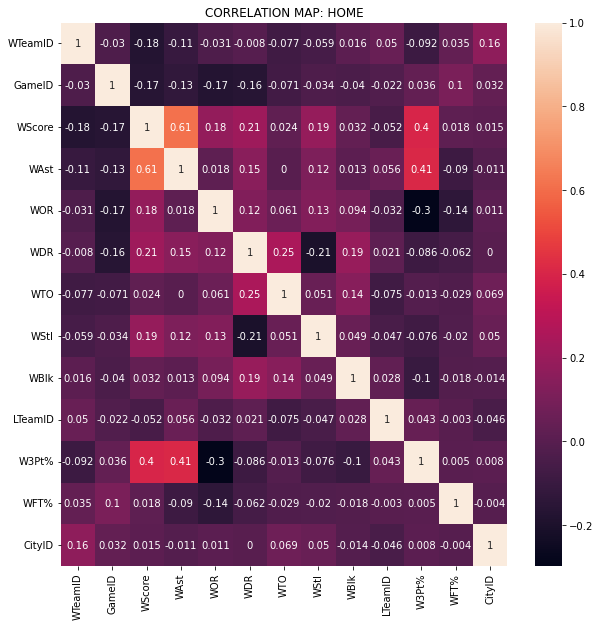

In [31]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from IPython.display import display
# SPLIT DATA INTO: HOME, AWAY, NEUTRAL
reg_data = pd.read_csv(r"C:\Users\Suhana\Spring23\ballinsights\regteamgamestats.csv")

regszn_home = reg_data[reg_data['WLoc'] == 'H']
regszn_away = reg_data[reg_data['WLoc'] == 'A']
regszn_neutral = reg_data[reg_data['WLoc'] == 'N']

# CORRELATION MAP: HOME, AWAY, NEUTRAL

corrRegHome = regszn_home.corr().round(3)
fig, ax = plt.subplots(figsize=(10,10)) 
ax.set_title('CORRELATION MAP: HOME')
display(sns.heatmap(corrRegHome, annot=True, ax=ax))

<AxesSubplot:title={'center':'CORRELATION MAP: AWAY'}>

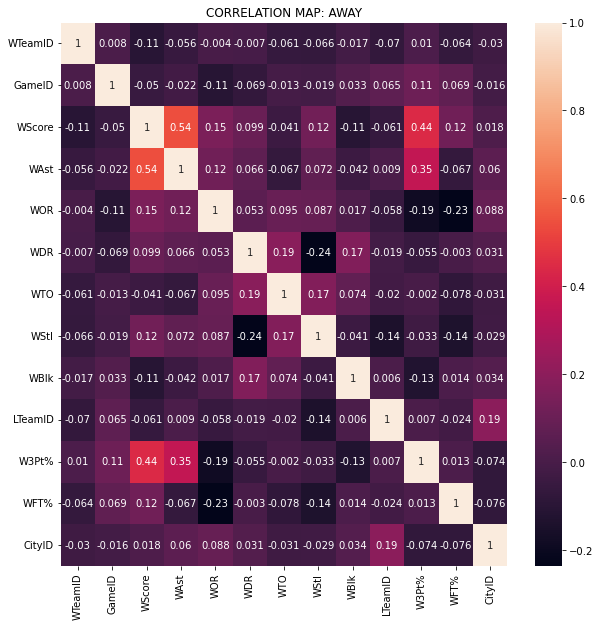

In [32]:
corrRegAway = regszn_away.corr().round(3)
fig, ax = plt.subplots(figsize=(10,10)) 
ax.set_title('CORRELATION MAP: AWAY')
display(sns.heatmap(corrRegAway, annot=True, ax=ax))

<AxesSubplot:title={'center':'CORRELATION MAP: NEUTRAL'}>

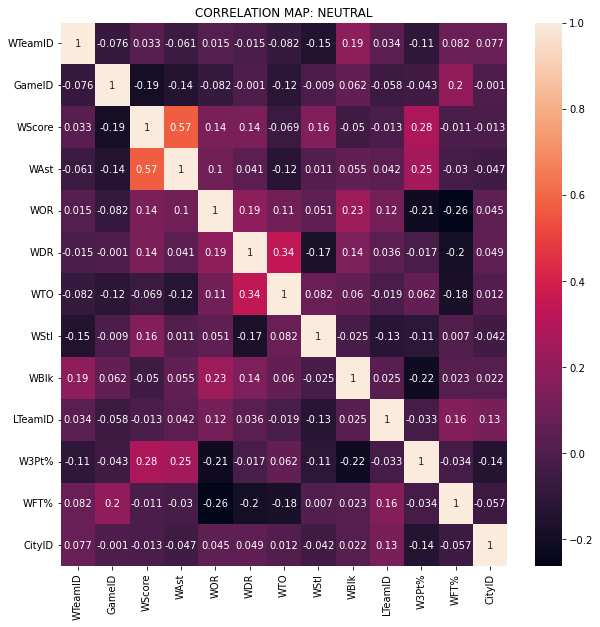

In [28]:
corrRegNeutral = regszn_neutral.corr().round(3)
fig, ax = plt.subplots(figsize=(10,10)) 
ax.set_title('CORRELATION MAP: NEUTRAL')
display(sns.heatmap(corrRegNeutral, annot=True, ax=ax))

##### Evaluating the Influence of the Game being Home vs Away on Identified Strongest Predictor Variables

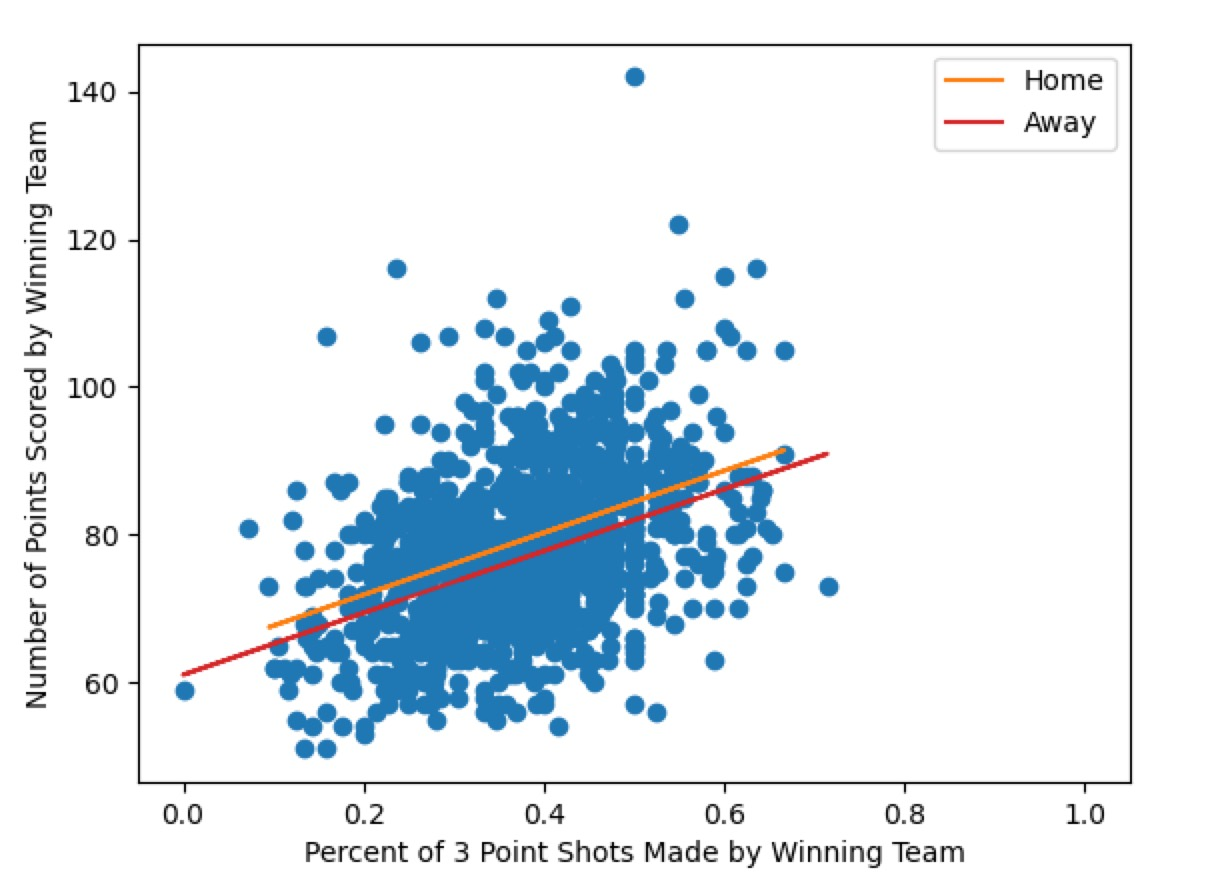

C:\Users\Suhana\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Text(0, 0.5, 'Number of Points Scored by Winning Team')

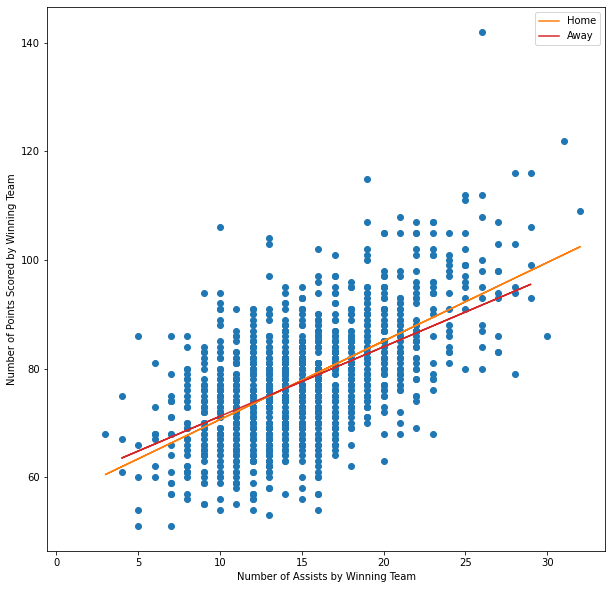

In [38]:
X_home_ast = regszn_home['WAst']
X_home_thrPt = regszn_home['W3Pt%']
X_home_WDR = regszn_home['WDR']
y_home = regszn_home['WScore']

X_away_ast = regszn_away['WAst']
X_away_thrPt = regszn_away['W3Pt%']
X_away_WDR = regszn_away['WDR']
y_away = regszn_away['WScore']

# plot different individual variables
X1_plot = reg_data['WAst']
X2_plot = reg_data['W3Pt%']
y_plot = reg_data['WScore']

X_home_ast = sm.add_constant(X_home_ast)
X_away1 = sm.add_constant(X_away_ast)
X_home_3pt = sm.add_constant(X_home_thrPt)
X_away_3pt = sm.add_constant(X_away_thrPt)

lr_home_1 = sm.OLS(y_home, X_home_ast).fit()
lr_away_1 = sm.OLS(y_away, X_away_ast).fit()
lr_home_2 = sm.OLS(y_home, X_home_thrPt).fit()
lr_away_2 = sm.OLS(y_away, X_away_thrPt).fit()


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.scatter(X1_plot, y_plot)
plt.plot(X_home_ast, 56.154 + 1.446*X_home_ast, label='Home')
plt.plot(X_away1, 58.416 + 1.28*X_away1, label='Away')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('Number of Assists by Winning Team')
plt.ylabel('Number of Points Scored by Winning Team')


Text(0, 0.5, 'Number of Points Scored by Winning Team')

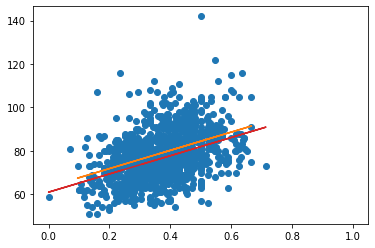

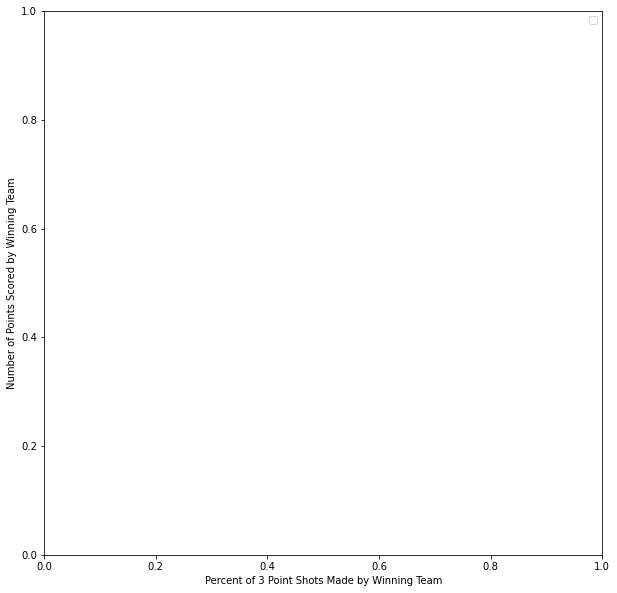

In [40]:
plt.scatter(X2_plot, y_plot)
plt.plot(X_home_3pt, 63.463 + 41.99*X_home_3pt, label='Home')
plt.plot(X_away_3pt, 61.02 + 41.91*X_away_3pt, label='Away')

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel('Percent of 3 Point Shots Made by Winning Team')
plt.ylabel('Number of Points Scored by Winning Team')


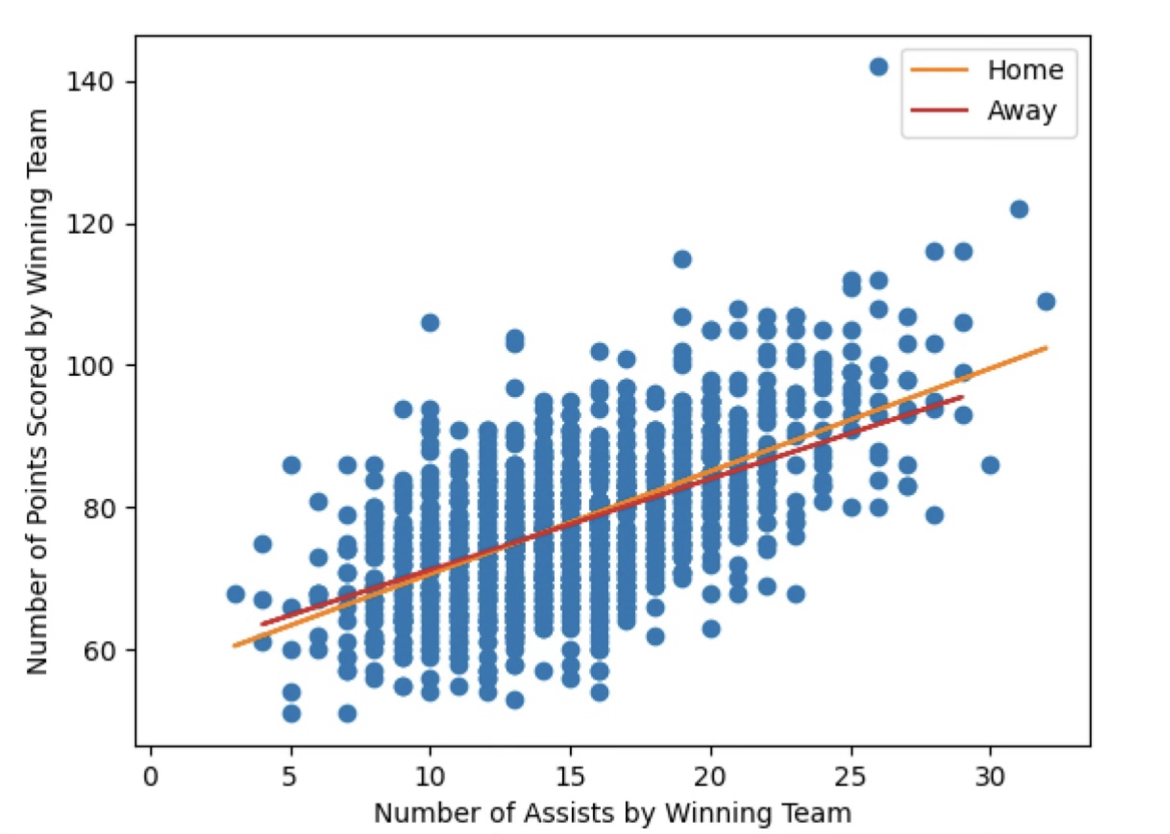